# Plotting results

In [152]:
import pickle, time, os #, sys, os

#limit the number of threds numpy/scipy are using
os.environ["OMP_NUM_THREADS"] = "10"
import numpy as np
import multiprocessing as mp
import pandas as pd
import scprep

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Custom pyscripts
maindir = '/home/lanhuong/Projects/ManifoldLearning/DiffusionTSNE'
#maindir = '/home/lanhuong/MEGA/BIOSTATS GROUP/Projects/ManifoldLearning/DiffusionTSNE'
os.chdir(maindir)
#sys.path.insert(0, maindir)
from diffusion_tsne import diffusion_tsne
from plotting import *
from utils import *
from metrics import *

EBT_sqrt = pd.read_pickle("examples/PhateExamples/EBT_sqrt.pkl")
sample_labels = np.load('examples/PhateExamples/EBT_sample_labels.npy')
fig_dir = "examples/PhateExamples/figs/"


def plot_results(Y, label_prefix="PC ", palette ='Spectral', legend = True):
    fig, (ax1) = plt.subplots(1,1, figsize=(10, 10))
    scprep.plot.scatter2d(
        Y, legend = legend, #title="PCA",
        fontsize = 16, s = 5, label_prefix= label_prefix,
        c=sample_labels, ticks=True, cmap=palette, ax=ax1)
    plt.show()
    return fig


In [133]:
import sklearn.decomposition # PCA
import sklearn.manifold # t-SNE

start = time.time()
pca_operator = sklearn.decomposition.PCA(n_components=50)
Y_pca50 = pca_operator.fit_transform(np.array(EBT_sqrt))
Y_pca = Y_pca50[:, range(2)]
end = time.time()
print("Embedded PCA in {:.2f} seconds.".format(end-start))
Y_pca.shape

Embedded PCA in 17.51 seconds.


(16821, 2)

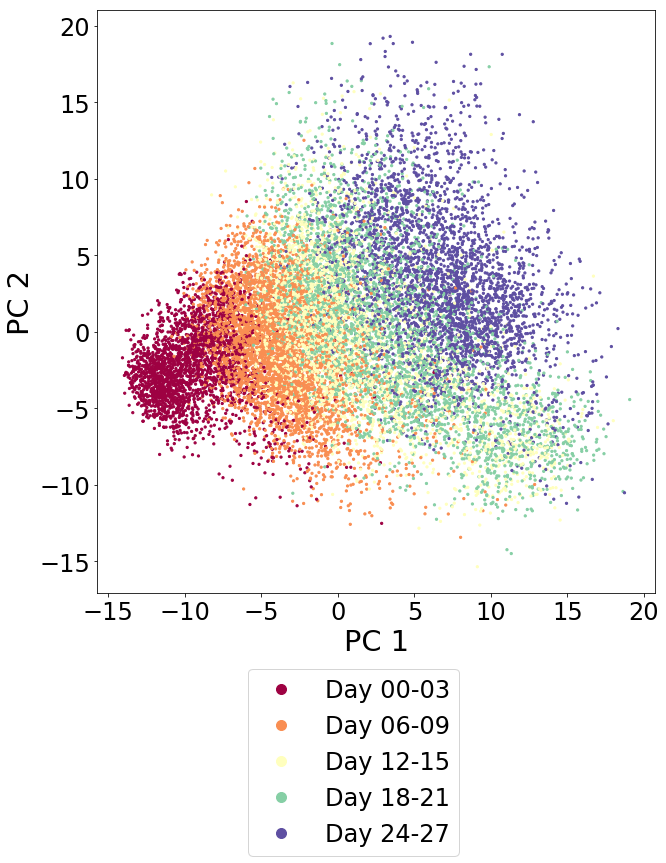

In [207]:
fig, (ax1) = plt.subplots(1,1, figsize=(10, 12))
scprep.plot.scatter2d(
        Y_pca,  legend_loc = (0.27, -0.45),
        fontsize = 20, s = 5, label_prefix= "PC ",
        c=sample_labels, ticks=True, cmap="Spectral", ax = ax1)
ax1.set_aspect(1.0)
fig.savefig(fig_dir + "EB_PCA_2.png", bbox_inches='tight')

In [ ]:
f = plot_results(Y_pca) 
f.savefig(fig_dir + "EB_PCA.pdf", bbox_inches='tight')

Calculating PHATE...
  Running PHATE on 16821 cells and 17619 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 27.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 22.96 seconds.
    Calculating affinities...
    Calculated affinities in 11.38 seconds.
  Calculated graph and diffusion operator in 72.58 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 12.07 seconds.
    Calculating KMeans...
    Calculated KMeans in 26.17 seconds.
  Calculated landmark operator in 40.59 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 15.23 seconds.
Calculated PHATE in 128.69 seconds.


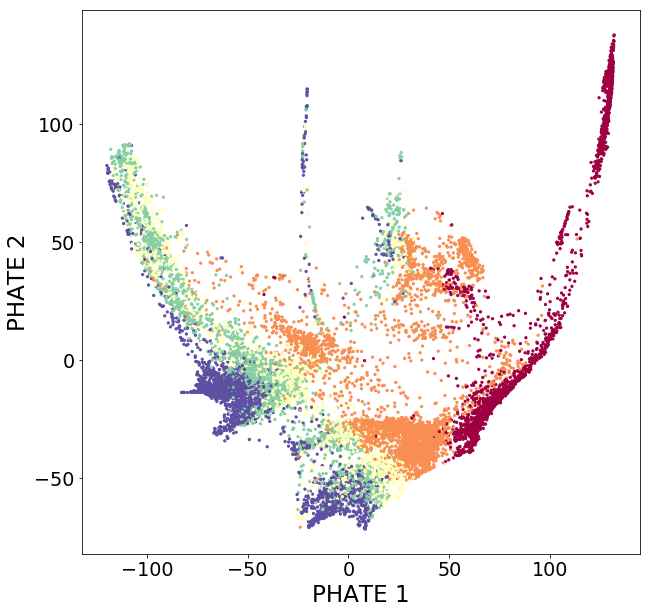

In [208]:
import phate
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(EBT_sqrt)
f = plot_results(Y_phate, label_prefix="PHATE ", legend = False) 
f.savefig(fig_dir + "EB_PHATE.png", bbox_inches='tight')

Seed used: 1558385835 for UMAP n_neigh 50
Time 59.929680


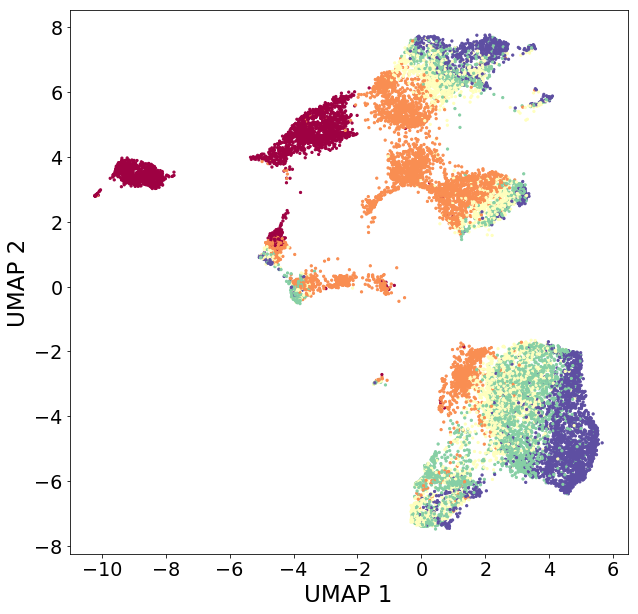

In [187]:
import umap
start = time.time()
n_neigh = 50
print("Seed used: %d for UMAP n_neigh %d" %(int(start), n_neigh ))
Y_umap = umap.UMAP(random_state = int(start), transform_seed = int(start), 
                   n_neighbors = n_neigh).fit_transform(Y_pca50)
end = time.time()
print("Time %f" %(end-start))
f = plot_results(Y_umap, label_prefix="UMAP ", legend = False) 
f.savefig(fig_dir + "EB_UMAP_nn" + str(n_neigh) + ".pdf", bbox_inches='tight')
# Seed used: 1558384638 for UMAP n_neigh 5
# Seed used: 1558384682 for UMAP n_neigh 10
# Seed used: 1558384799 for UMAP n_neigh 15
# Seed used: 1558385778 for UMAP n_neigh 30
# Seed used: 1558385835 for UMAP n_neigh 50


In [178]:
# Load data
dir_name = 'examples/PhateExamples/results/standard_tsne/'
filename = 'phate_vanilla_tsne_res_seed1558244685.pkl'
infile = open(dir_name+filename,'rb')
new_dict = pickle.load(infile) 
infile.close()
locals().update(new_dict)

dir_name = 'examples/PhateExamples/results/diffusion_tsne/'
filename = 'phate_diffusion_tsne_p20_seed1558246060.pkl'
infile = open(dir_name+filename,'rb')
new_dict = pickle.load(infile) 
infile.close()
locals().update(new_dict)

dir_name = 'examples/PhateExamples/results/scaled_diffusion_tsne/'
filename = 'phate_scaled_diffusion_tsne_p20_seed90726.pkl'
infile = open(dir_name+filename,'rb')
new_dict = pickle.load(infile) 
infile.close()
locals().update(new_dict)

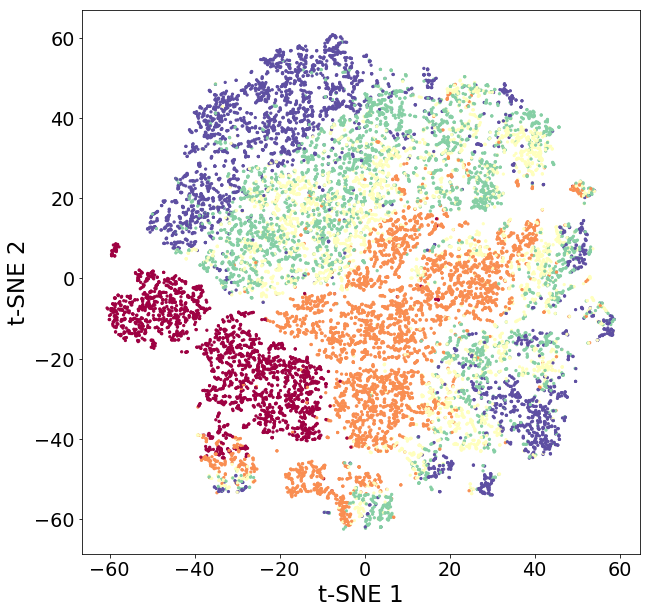

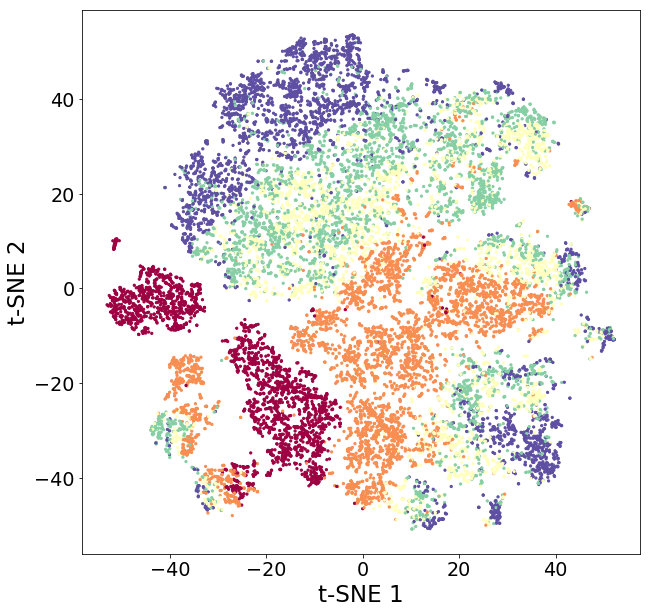

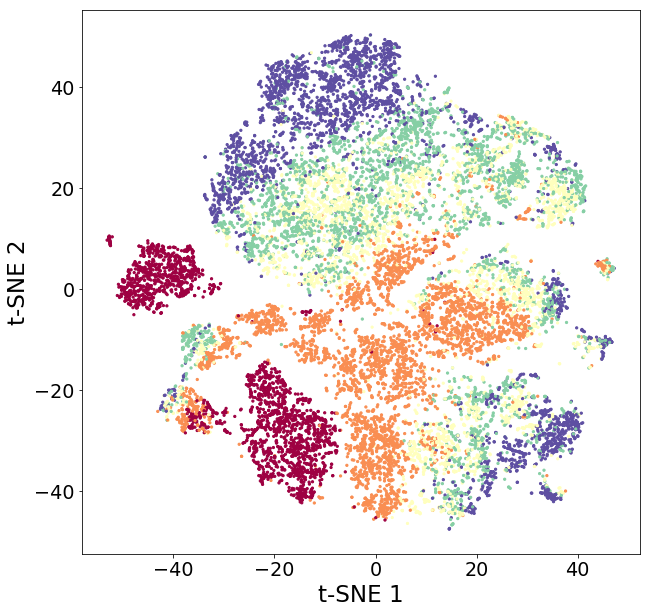

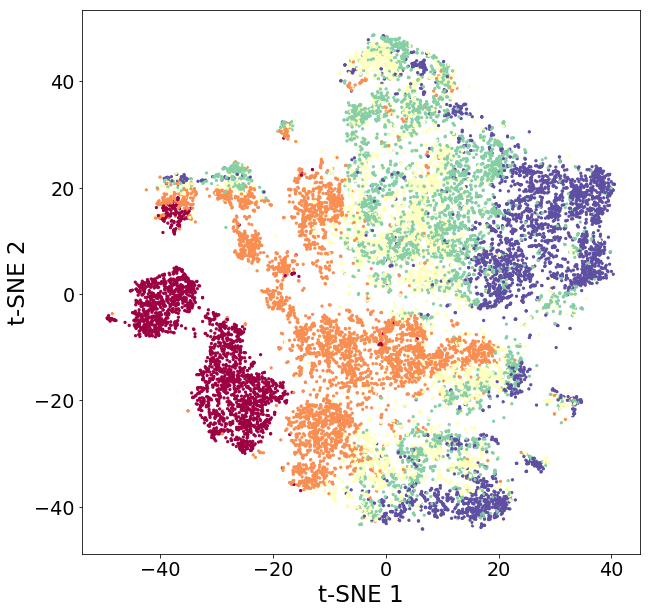

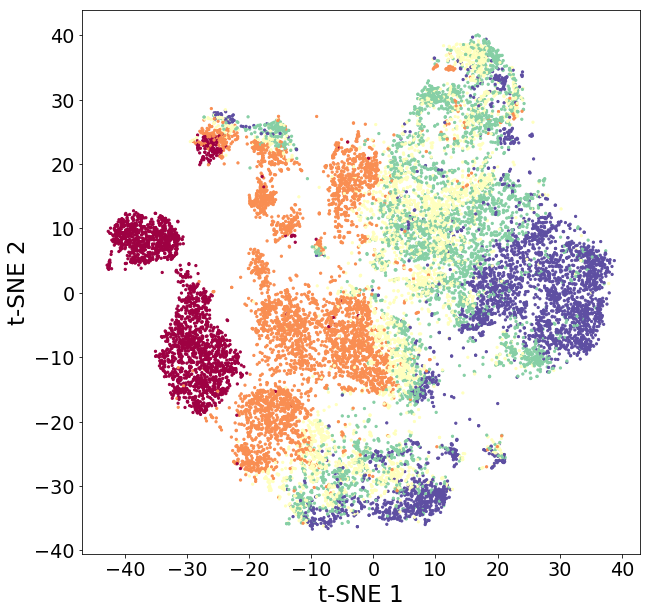

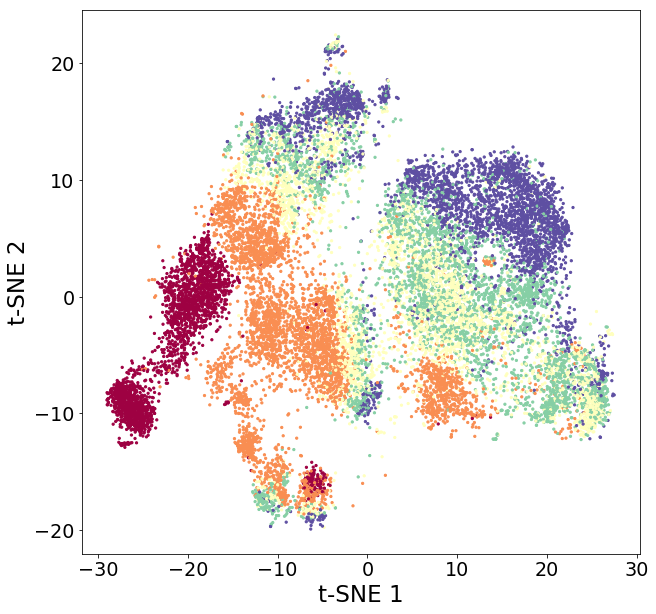

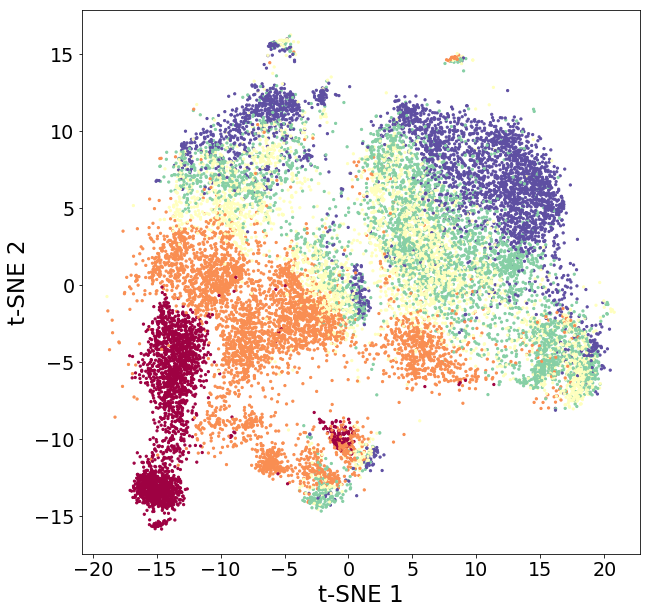

In [209]:
vanilla_tsne_lst = [Y_fitsne10, Y_fitsne20, Y_fitsne30, Y_fitsne50, Y_fitsne100,
                   Y_fitsne500, Y_fitsne1000]
perps = [10, 20, 30, 50, 100, 500, 1000]

for i, Y in enumerate(vanilla_tsne_lst):
    f = plot_results(Y, label_prefix="t-SNE ", legend = False) 
    filename = "EB_vanilla_tsne_perp" + str(perps[i]) + ".png"
    f.savefig(fig_dir + filename, bbox_inches='tight')

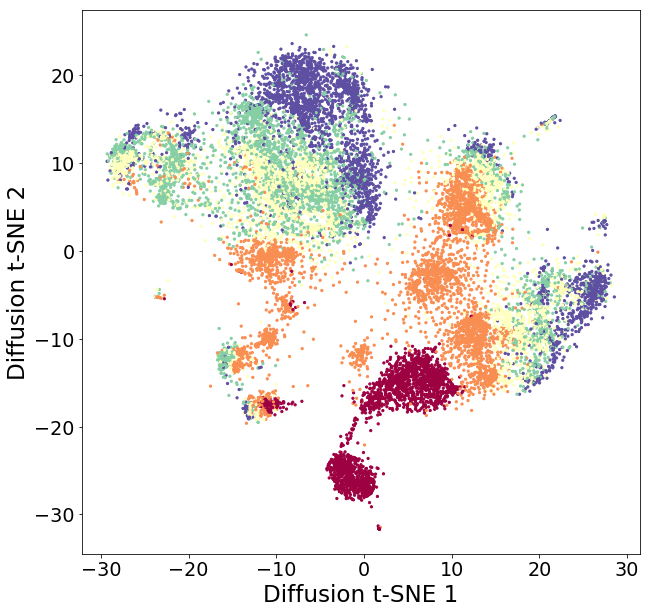

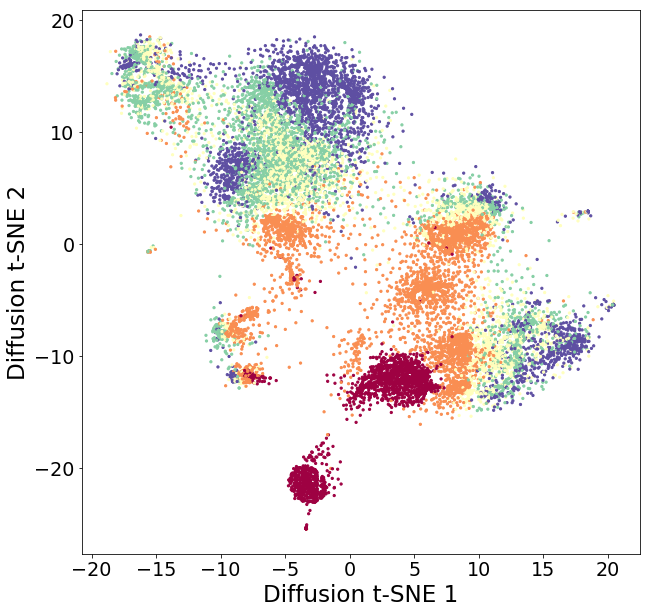

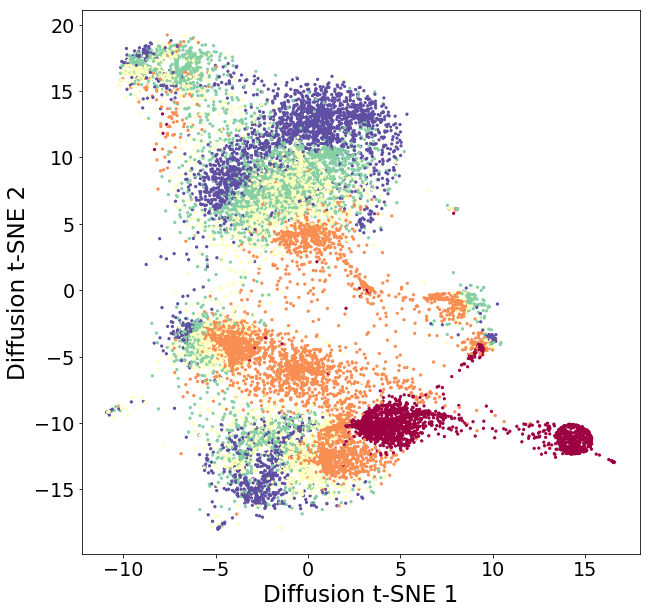

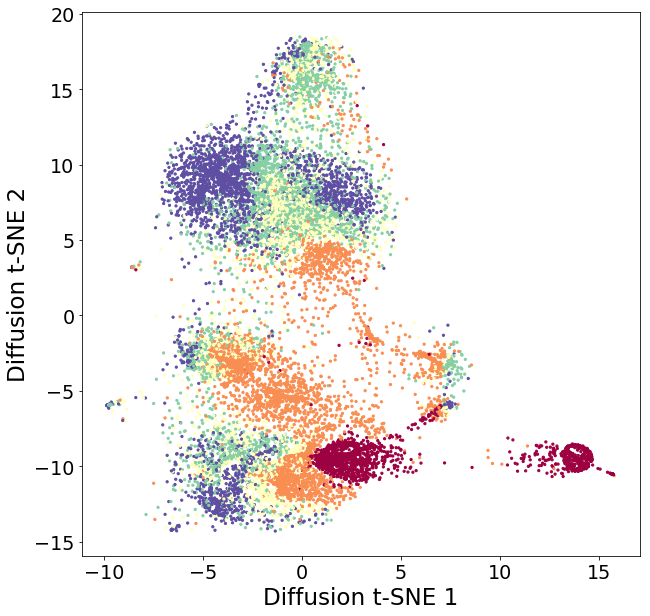

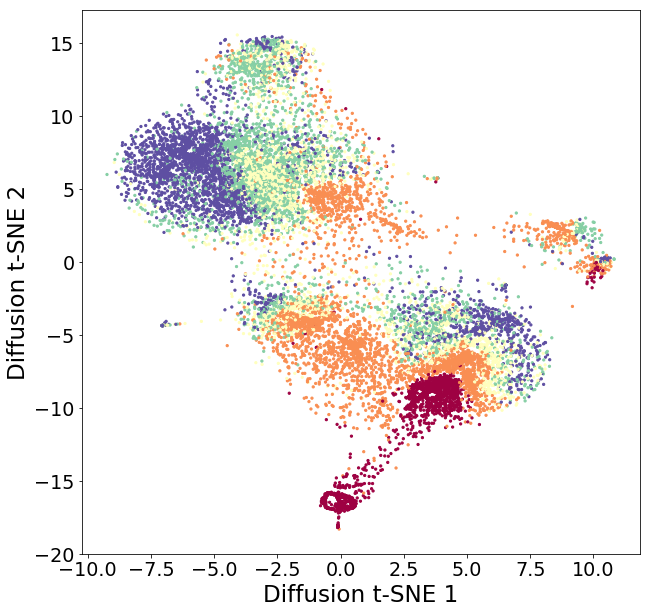

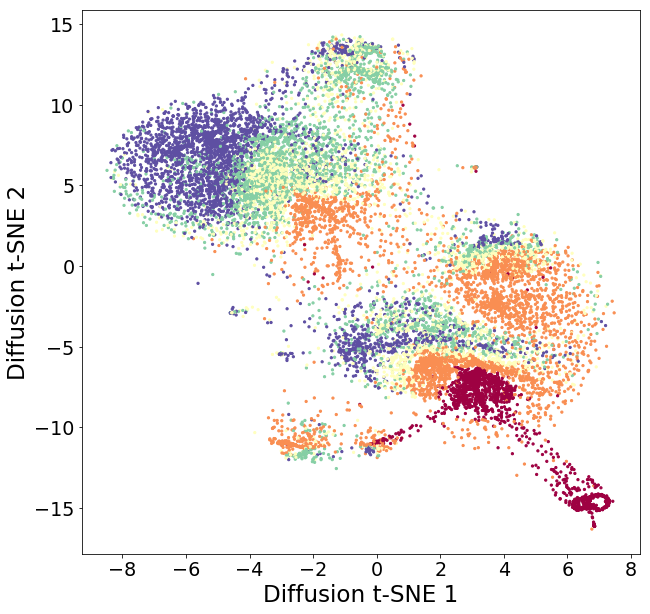

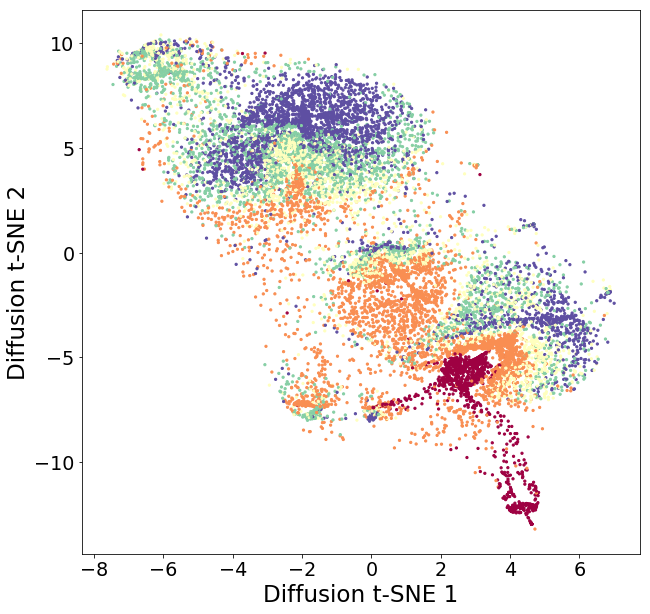

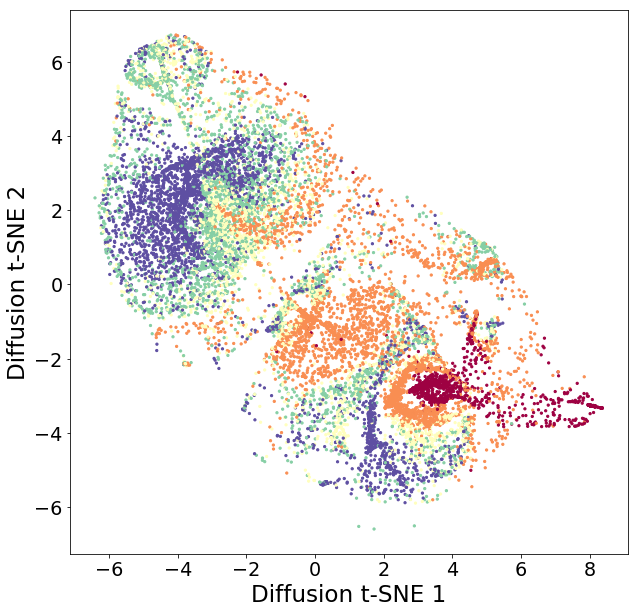

In [210]:
diffusion_tsne_lst = [
    Y_difftsne_p20_t5, Y_difftsne_p20_t10, Y_difftsne_p20_t15, 
    Y_difftsne_p20_t20, Y_difftsne_p20_t25,Y_difftsne_p20_t30,
    Y_difftsne_p20_t50, Y_difftsne_p20_t100]
tsteps = [5, 10, 15, 20, 25, 30, 50, 100]

for i, Y in enumerate(diffusion_tsne_lst):
    f = plot_results(Y, label_prefix="Diffusion t-SNE ", legend = False) 
    filename = "EB_diffusion_tsne_perp20_tstep" + str(tsteps[i]) + ".png"
    f.savefig(fig_dir + filename, bbox_inches='tight')

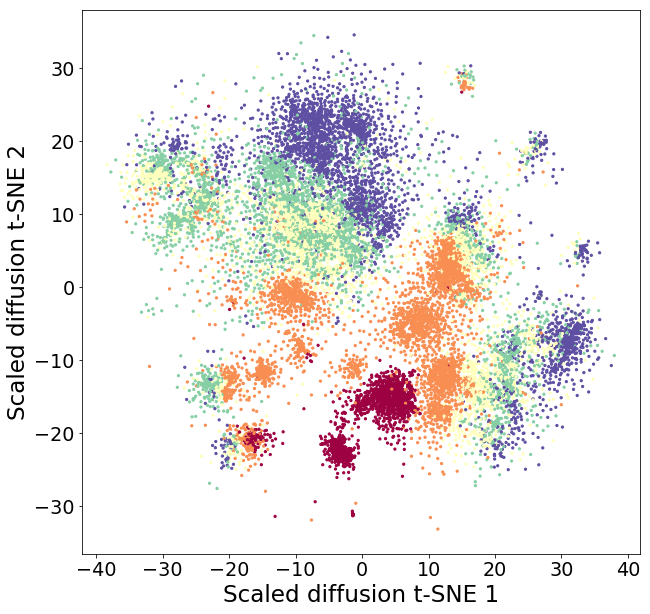

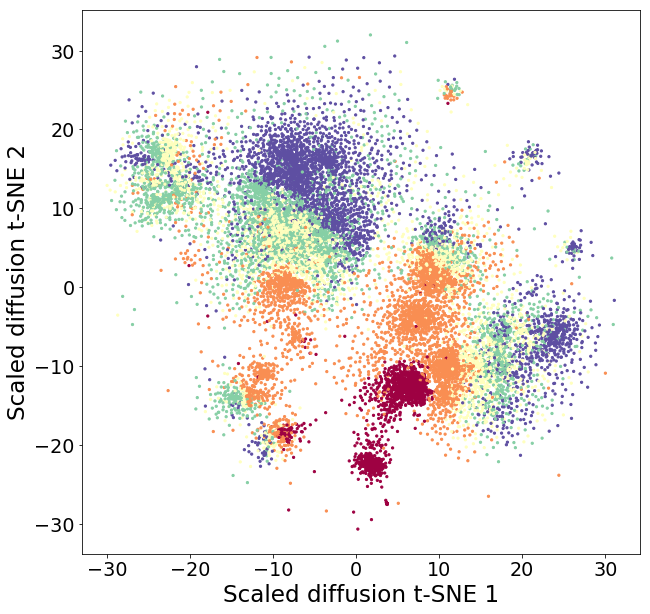

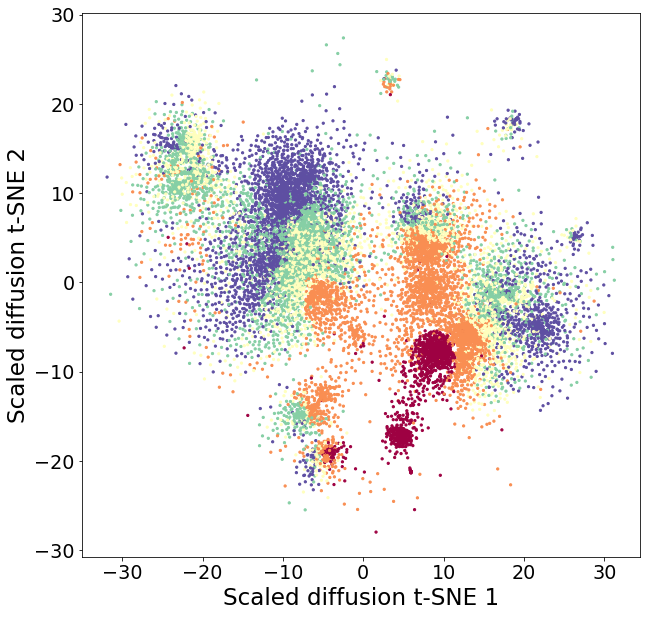

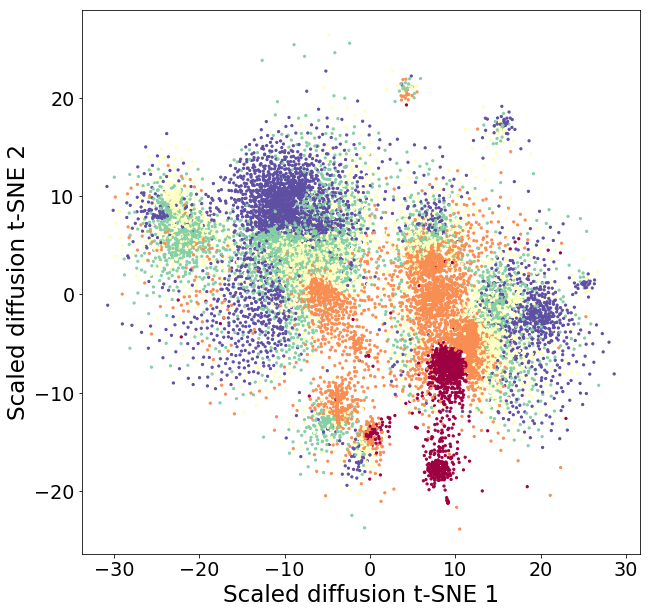

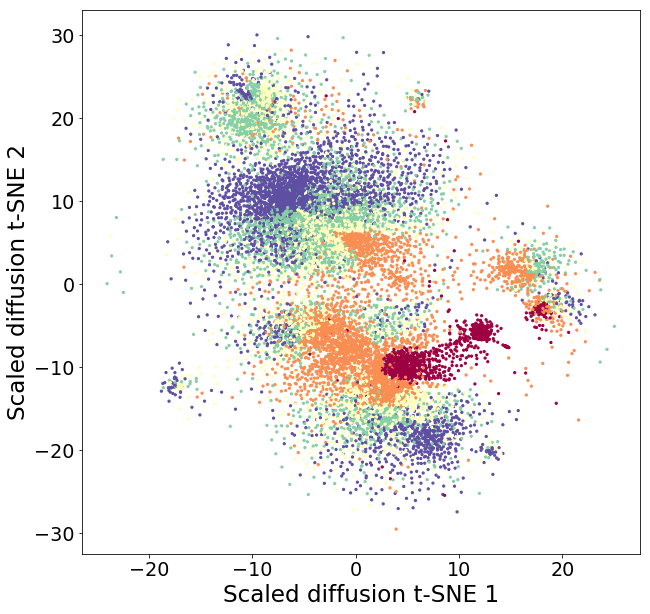

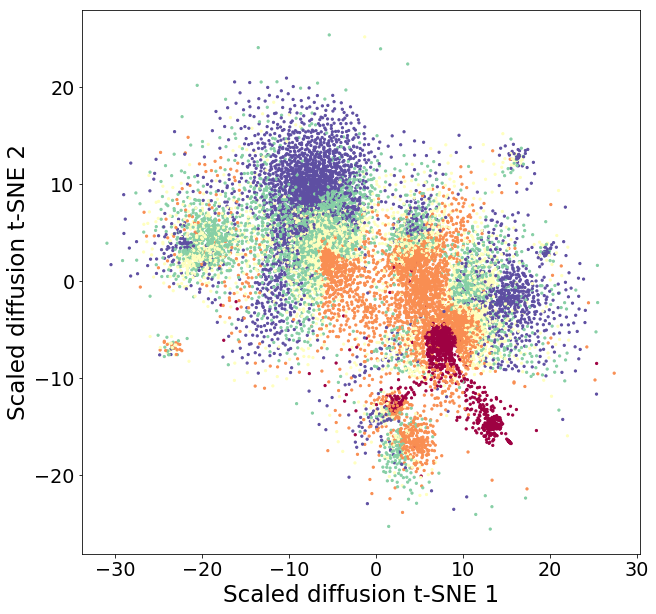

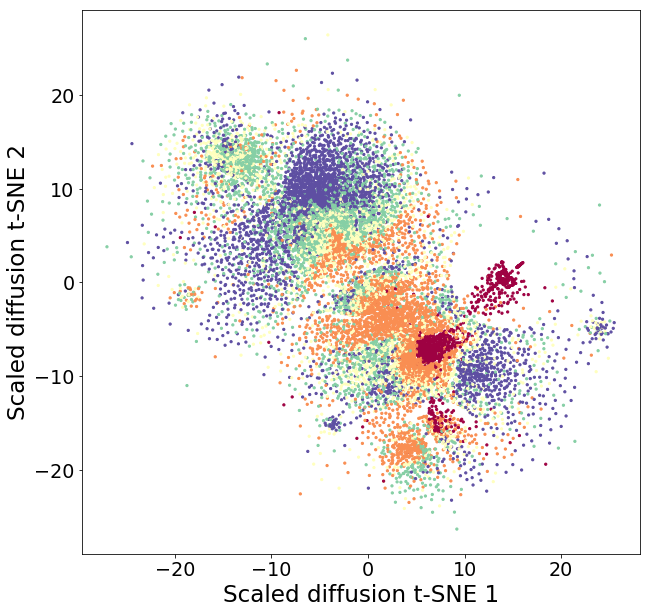

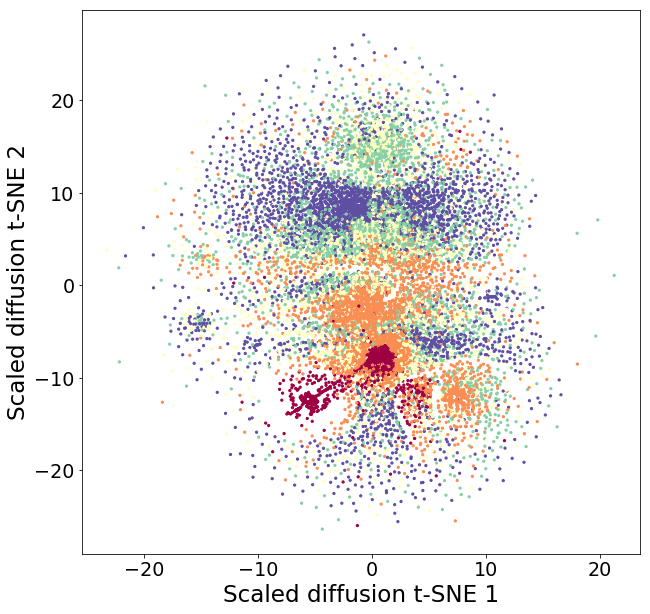

In [211]:
scaled_diffusion_tsne_lst = [
    Y_scaled_difftsne_p20_t5, Y_scaled_difftsne_p20_t10, Y_scaled_difftsne_p20_t15, 
    Y_scaled_difftsne_p20_t20, Y_scaled_difftsne_p20_t25, Y_scaled_difftsne_p20_t30,
    Y_scaled_difftsne_p20_t50, Y_scaled_difftsne_p20_t100]
tsteps = [5, 10, 15, 20, 25, 30, 50, 100]

for i, Y in enumerate(scaled_diffusion_tsne_lst):
    f = plot_results(Y, label_prefix="Scaled diffusion t-SNE ", legend = False) 
    filename = "EB_scaled_diffusion_tsne_perp20_tstep" + str(tsteps[i]) + ".png"
    f.savefig(fig_dir + filename, bbox_inches='tight')